# Laboratorio 6 Descomposición de grafos

En este laboratorio utilizaremos la librería Networkx para aplicar distintas formas de descomponer un grafo y las diferencias entre los resultados de cada método.


Contenidos:

0.   Zachary’s Karate Club
1.   k-core decomposition
2.   Backbone decomposition.


In [1]:
import networkx as nx
%matplotlib inline

# Ejemplo Grafo Zachary’s Karate Club

En este laboratorio trabajaremos con un ejemplo clásico. La red captura a 34 miembros de un club de karate, documentando vínculos entre pares de miembros que interactuaron fuera del club. Durante el estudio surgió un conflicto entre el administrador "Officer" y el instructor "Mr. Hi", lo que llevó a la división del club en dos. La mitad de los miembros formaron un nuevo club en torno al Sr. Hi; Los miembros de la otra parte encontraron un nuevo instructor o abandonaron el Karate. Según los datos recopilados, Zachary asignó correctamente a todos los miembros del club menos uno a los grupos a los que realmente se unieron después de la separación.

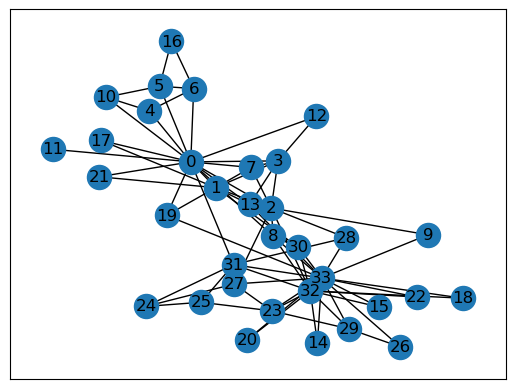

In [2]:
G = nx.karate_club_graph()
# Dibuja el grafo
nx.draw_networkx(G, with_labels=True)

Veamos el club de cada nodo

In [3]:
[{node, G.nodes[node]['club']} for node in G.nodes]

[{0, 'Mr. Hi'},
 {1, 'Mr. Hi'},
 {2, 'Mr. Hi'},
 {3, 'Mr. Hi'},
 {4, 'Mr. Hi'},
 {5, 'Mr. Hi'},
 {6, 'Mr. Hi'},
 {7, 'Mr. Hi'},
 {8, 'Mr. Hi'},
 {9, 'Officer'},
 {10, 'Mr. Hi'},
 {11, 'Mr. Hi'},
 {12, 'Mr. Hi'},
 {13, 'Mr. Hi'},
 {14, 'Officer'},
 {15, 'Officer'},
 {16, 'Mr. Hi'},
 {17, 'Mr. Hi'},
 {18, 'Officer'},
 {19, 'Mr. Hi'},
 {20, 'Officer'},
 {21, 'Mr. Hi'},
 {22, 'Officer'},
 {23, 'Officer'},
 {24, 'Officer'},
 {25, 'Officer'},
 {26, 'Officer'},
 {27, 'Officer'},
 {28, 'Officer'},
 {29, 'Officer'},
 {30, 'Officer'},
 {31, 'Officer'},
 {32, 'Officer'},
 {33, 'Officer'}]

Grafiquemos los grupos por color donde el grupo 'Mr:Hi' es de color azul y 'Officer' son de color rojo.


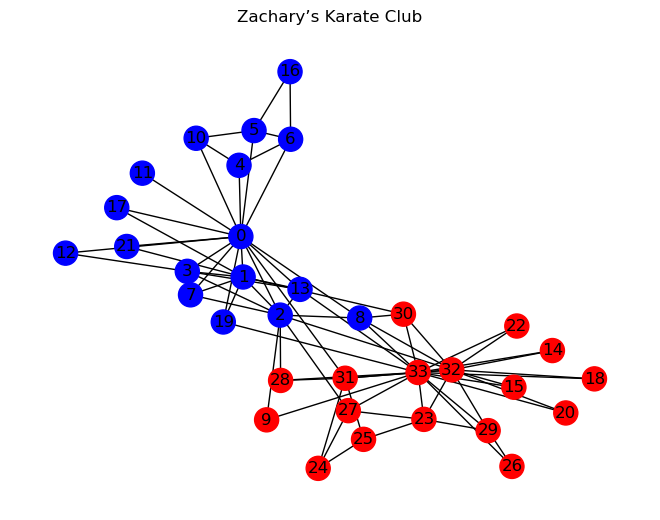

In [4]:
import matplotlib.pyplot as plt
# Obtener los colores de los nodos basados en la afiliación a los clubes
club_color = {'Mr. Hi': 'blue', 'Officer': 'red'}
node_colors = [club_color[G.nodes[node]['club']] for node in G.nodes]

# Dibujar el grafo
pos = nx.spring_layout(G, seed=1)  # Posicionamiento de los nodos
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Blues)
plt.title("Zachary’s Karate Club")
plt.show()

# k-core decomposition

El k-core de un grafo tiene nodos con grado mayor o igual a k. Representando así la parte del grafo con mayor cantidad de conexiones entre los nodos. La librería Networkx tiene una función especial para esto `k-core(k)` a la cual le entregamos el k que deseemos analizar, devolviendo un subgrafo con las codiciones pedidas.



Como ejemplo realizaremos un k-core con k = 2 en el grafo del club de karate.

In [5]:
K = nx.k_core(G, k=2)
print("Nodos eliminados:", list(set(G.nodes) - set(K.nodes)))

Nodos eliminados: [11]


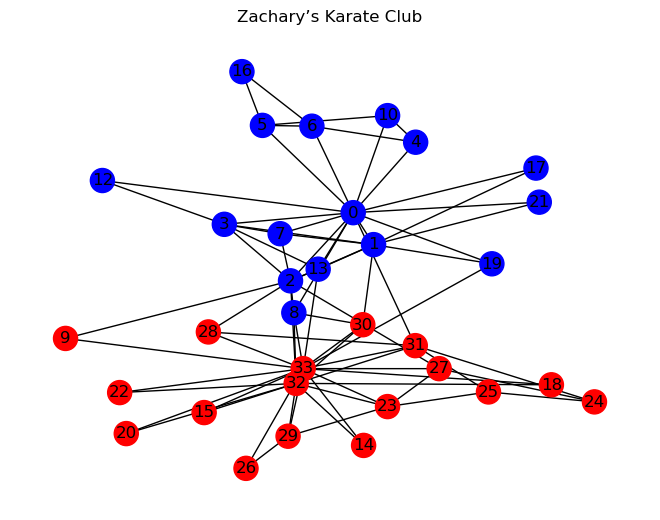

In [6]:
pos = nx.spring_layout(K, seed=1)  # Posicionamiento de los nodos
node_colors = [club_color[K.nodes[node]['club']] for node in K.nodes]
nx.draw(K,pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Blues)
plt.title("Zachary’s Karate Club")
plt.show()

Con esto podemos apreciar de mejor manera los lideres de cada grupo, y por lo tanto nos da una idea de la influecia de los nodos en el grafo.

Ahora tomaremos k = 3, veamos que nodos obetenemos en la descomposición.

Nodos eliminados: [9, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26]


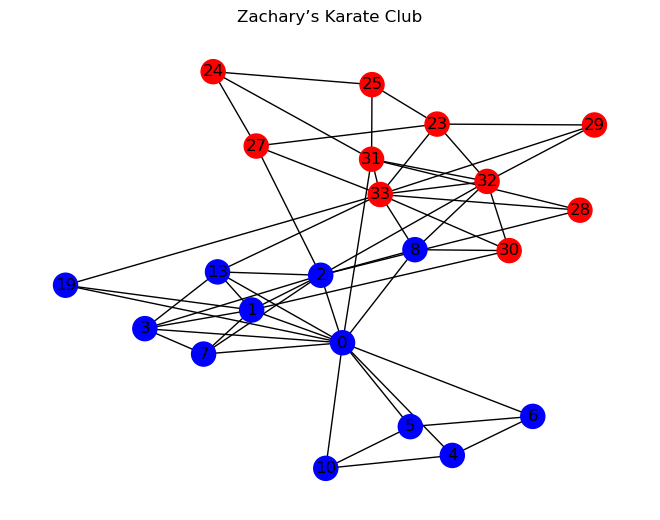

In [7]:
K = nx.k_core(G, k=3)
print("Nodos eliminados:", list(set(G.nodes) - set(K.nodes)))

pos = nx.spring_layout(K, seed=1)  # Posicionamiento de los nodos
node_colors = [club_color[K.nodes[node]['club']] for node in K.nodes]
nx.draw(K,pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Blues)
plt.title("Zachary’s Karate Club")
plt.show()


# Backbone decomposition.

La descomposición del "backbone" de un grafo generalmente implica la identificación y retención de las conexiones más importantes o relevantes en el grafo. Una forma común de hacer esto es retener solo las aristas que están por encima de cierto umbral, por ejemplo, en términos de su fuerza o peso.

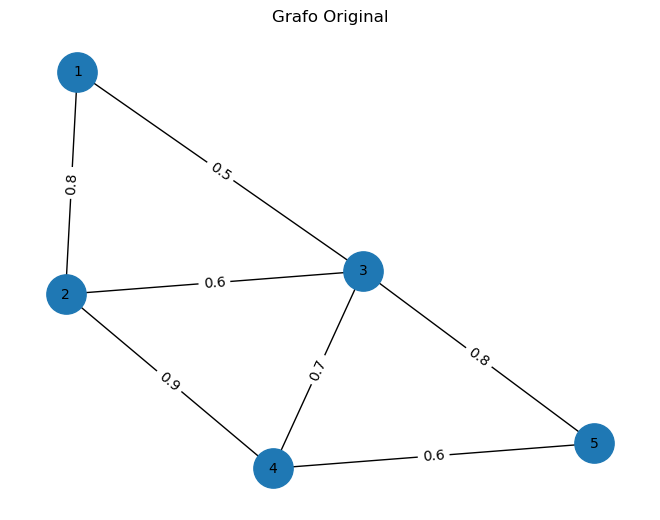

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo ponderado de ejemplo
G = nx.Graph()
G.add_edges_from([(1, 2, {'weight': 0.8}),
                  (1, 3, {'weight': 0.5}),
                  (2, 3, {'weight': 0.6}),
                  (2, 4, {'weight': 0.9}),
                  (3, 4, {'weight': 0.7}),
                  (3, 5, {'weight': 0.8}),
                  (4, 5, {'weight': 0.6})])

# Dibujar el grafo original con los pesos
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=10, font_color='black', font_family='sans-serif', node_size=800)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.title("Grafo Original")
plt.show()


Creamos una función para calcular la probabilidad que una arista tenga al menos un peso w, bajo la hipótesis donde los pesos de las aristas tienen una distribución uniforme.

In [9]:

#Creamos la función para calcular las probabilidades necesarias

def power(G,u,v):
  strength = sum([G[u_aux][v_aux]['weight'] for u_aux, v_aux, d_aux in G.edges(data=True) if u_aux ==u or v_aux == u])
  return (1 - G[u][v]['weight']/strength )**(nx.degree(G, u) - 1)

[(u, v, power(G,u,v)) for u, v, d in G.edges(data=True)]



[(1, 2, 0.3846153846153846),
 (1, 3, 0.6153846153846154),
 (2, 3, 0.546313799621928),
 (2, 4, 0.37051039697542537),
 (3, 4, 0.39024806554392366),
 (3, 5, 0.3318161128812016),
 (4, 5, 0.5289256198347108)]

Ahora nos quedamos con las aristas que tengan una probabilidad menor a un umbral (threshold), 0.5 para este ejemplo.

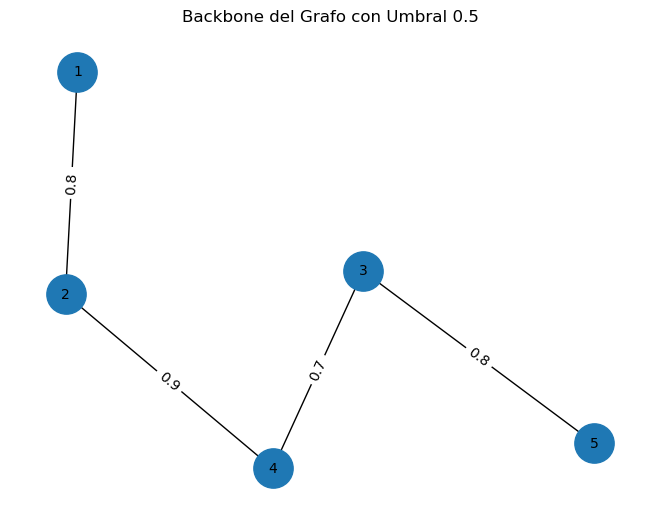

In [10]:
threshold = .5
# Calcular el "backbone" del grafothreshold = 0.5
backbone_edges = [(u, v) for u, v, d in G.edges(data=True) if power(G,u,v) < threshold]

# Crear el grafo del "backbone"
backbone_graph = G.edge_subgraph(backbone_edges)

# Dibujar el grafo del "backbone"
nx.draw(backbone_graph, pos, with_labels=True, font_size=10, font_color='black', font_family='sans-serif', node_size=800)
edge_labels = nx.get_edge_attributes(backbone_graph, "weight")
nx.draw_networkx_edge_labels(backbone_graph, pos, edge_labels)
plt.title(f"Backbone del Grafo con Umbral {threshold}")
plt.show()